# Real Estate
**Authored by**: Prathibha Kandawala

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data Analysis </div> 
</div>

**Scenario**

As an urban planner working for the city of Melbourne,

I want to analyse the distribution and trends of dwelling numbers across different areas within the city,

So that we can gain insights into which areas have high or low dwelling densities, identify significant changes or patterns over time, and understand the spatial and temporal dynamics of housing distribution.

This will help to make informed decisions on urban planning, resource allocation, and infrastructure development to accommodate the evolving needs of the city’s residents effectively.

**What this use case will teach you**

This use case will teach you:

1. How to analyse the distribution and trends of dwelling numbers across different areas within a city.
2. How to identify areas with high or low dwelling numbers using descriptive statistics such as mean, median, and standard 3. deviation.
3. How to perform correlation analysis to understand the relationships between dwelling numbers and other relevant variables.

At the end of this use case, I will

- Gain proficiency in analysing and visualising the distribution and trends of dwelling numbers.
- Learn how to use descriptive statistics to identify areas with high or low dwelling numbers.
- Develop skills in correlation analysis to explore relationships between dwelling numbers and other relevant variables.

<div class="usecase-section-header">Analysing Economic Dynamics for Urban Development and Real Estate Planning</div>

In Melbourne, understanding dwelling numbers across different areas is crucial for urban planning, resource allocation, and socioeconomic analysis. This analysis aims to provide insights into dwelling distribution trends and identify areas with high or low dwelling numbers. The datasets used include floor space by block and industry and residential dwelling counts, sourced from the Melbourne City open data portal. These datasets offer comprehensive information on dwelling numbers and related industries, enabling a holistic analysis of Melbourne's urban landscape.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

### Load residential dwellings dataset

This block of code is responsible for fetching and loading the residential dwellings dataset from the Melbourne city open data portal via an API. Here’s a detailed breakdown of each step:

1. Define Data and API Details:
dataset_id identifies the specific dataset to be accessed, in this case, 'residential-dwellings'.
base_url is the root URL for the API that provides access to the dataset.
apikey_file points to a local file that contains your API key. This key is necessary for authentication to access the dataset.
format specifies the format in which the data should be returned, here as a CSV (Comma-Separated Values) file.
2. Read the API Key:
The API key is read from a text file. This key is required to authenticate your request to the API server.
3. Construct the Request URL and Parameters:
url combines the base URL with the dataset identifier and the export format.
params sets various parameters for the API request:
select: '*' indicates that all fields should be included in the response.
limit: -1 requests all records in the dataset.
lang: specifies the language for the API responses.
timezone: sets the timezone for any time data.
api_key: includes the API key read from the file.
4. Make the API Request:
A GET request is made using the requests.get() function with the constructed URL and parameters. This retrieves the dataset from the API.
5. Handle the API Response:
The response is checked for a successful status code (200). If successful, the content of the response, which is in CSV format, is read and converted into a pandas DataFrame using pd.read_csv() after decoding it from UTF-8.
The delimiter parameter is set to ';' because the data fields in the CSV are separated by semicolons.
A sample of 10 random entries from the DataFrame is printed to give an overview of the data structure and contents.
6 Error Handling:
If the API request fails (i.e., does not return a status code of 200), an error message is printed displaying the status code, helping to diagnose what went wrong.

In [2]:
dataset_id = 'residential-dwellings'
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey_file = "C:/Users/ASER/Documents/MOP Prath/API.txt"
format = 'csv'

with open(apikey_file, 'r') as file:
    apikey = file.read().strip()

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    residential_dwellings = pd.read_csv(StringIO(url_content), delimiter=';')
    print(residential_dwellings.sample(10, random_state=999))  # Test
else:
    print(f'Request failed with status code {response.status_code}')


        census_year  block_id  property_id  base_property_id  \
52936          2018       732       110482            110482   
164738         2016      2516       614680            614680   
129892         2013       328       560796            107110   
6938           2006       910       108487            108487   
78980          2002       861       107375            107375   
60032          2009       511       100305            100305   
151863         2010       101       623962            623962   
44513          2022       352       556077            556077   
42587          2012       355       106001            106001   
17224          2007       420       104712            104712   

                                      building_address  \
52936          109-117 Clarendon Street SOUTHBANK 3006   
164738             12 McConnell Street KENSINGTON 3031   
129892          21 Plane Tree Way NORTH MELBOURNE 3051   
6938                   141 Royal Parade PARKVILLE 3052   
78980

In [3]:
print("Shape of the dataset:", residential_dwellings.shape)

Shape of the dataset: (198651, 11)


### Group residential dwelling dataset by 'Census year' and 'Dwelling type' and  count the unique 'Dwelling number'

Now this code processes the residential dwellings dataset to aggregate and summarise the number of dwellings based on the census year and type of dwelling.

1. **Create DataFrame**:
   - `df1 = pd.DataFrame(residential_dwellings)` initialises a new DataFrame `df1` using the data loaded into `residential_dwellings`. This makes it clear and ensures that the operations are performed on a DataFrame structure.
2. **Group and Aggregate Data**:
   - The data is grouped by 'Census year' and 'Dwelling type' using `df1.groupby(['census_year', 'dwelling_type'])`. This groups the data into subsets based on the unique combinations of years and types of dwellings.
   - For each group, the sum of 'dwelling_number' is calculated. This aggregation helps to determine the total number of each type of dwelling for every census year.
   - `.reset_index()` is used to transform the grouped data back into DataFrame format with appropriate indices.
3. **Rename Column for Clarity**:
   - The aggregated column is initially still named 'dwelling_number', which might be confusing. It is renamed to 'Dwelling count' using `.rename(columns={'dwelling_number': 'Dwelling count'}, inplace=True)`. This makes the table more readable and clearly communicates that the numbers represent counts of dwellings.
4. **Output the Results**:
   - The final DataFrame `dwelling_count_detail` is printed using `print(dwelling_count_detail)`. This shows the summarised data, providing insights into how many dwellings of each type were present in each census year.

In [4]:
df1 = pd.DataFrame(residential_dwellings)

# Group by 'Census year' and 'Dwelling type', then sum 'Dwelling number'
dwelling_count_detail = df1.groupby(['census_year', 'dwelling_type'])['dwelling_number'].sum().reset_index()

# Rename the sum column for clarity
dwelling_count_detail.rename(columns={'dwelling_number': 'Dwelling count'}, inplace=True)

# Print the resulting table
print(dwelling_count_detail)

    census_year           dwelling_type  Dwelling count
0          2002         House/Townhouse            6751
1          2002  Residential Apartments           21725
2          2002      Student Apartments            2050
3          2003         House/Townhouse            6873
4          2003  Residential Apartments           23412
..          ...                     ...             ...
58         2021  Residential Apartments           86782
59         2021      Student Apartments            5484
60         2022         House/Townhouse           10110
61         2022  Residential Apartments           90005
62         2022      Student Apartments            7612

[63 rows x 3 columns]


### Count  'Dwelling type' and total 'Dwelling number' by each year


To provide a structured view of the sum of dwellings by type for each census year, and additionally calculate a total count of all dwelling types for each year, we can further manipulate the residential dwellings data. Here’s a detailed explanation of each step:

1. **Group and Aggregate Data**:
   - The DataFrame `df1` is grouped by both 'Census year' and 'Dwelling type' using `df1.groupby(['census_year', 'dwelling_type'])`. This grouping organises the data into subsets based on the year and type of dwelling.
   - The sum of 'dwelling_number' is calculated for each group, providing the total number of dwellings for each type in each census year.
   - `.unstack(fill_value=0)` is used to pivot the 'Dwelling type' level of the index to the columns, creating a new DataFrame where each type of dwelling becomes a column, and each row represents a census year. The `fill_value=0` parameter ensures that any missing values are filled with 0, which prevents any NaN values that could occur if a particular dwelling type was not present in a census year.
2. **Add a Total Column**:
   - `dwelling_count_by_type['Total Dwelling Number'] = dwelling_count_by_type.sum(axis=1)` adds a new column named 'Total Dwelling Number' to the DataFrame. This column is the result of summing all the dwelling type columns for each row (each census year), which is accomplished by specifying `axis=1` to sum across columns.
3. **Output the Results**:
   - The final DataFrame `dwelling_count_by_type` is printed, showing the aggregated counts of each type of dwelling per census year and the total dwellings per year. This table provides a clear overview of the distribution and changes in dwelling types over the years, useful for tracking housing trends and planning.

In [5]:
# Group by 'Census year' and 'Dwelling type', then sum 'Dwelling number'
dwelling_count_by_type = df1.groupby(['census_year', 'dwelling_type'])['dwelling_number'].sum().unstack(fill_value=0)

# Add a total column that sums all dwelling types for each year
dwelling_count_by_type['Total Dwelling Number'] = dwelling_count_by_type.sum(axis=1)

# Print the resulting table
print(dwelling_count_by_type)

dwelling_type  House/Townhouse  Residential Apartments  Student Apartments  \
census_year                                                                  
2002                      6751                   21725                2050   
2003                      6873                   23412                2444   
2004                      7107                   25211                2713   
2005                      7199                   28364                3566   
2006                      7234                   31242                3575   
2007                      7663                   32895                4414   
2008                      8934                   35198                4267   
2009                      9094                   36455                4877   
2010                      9148                   37272                4875   
2011                      9305                   39242                4873   
2012                      9567                   39914          

### Group residential dwelling dataset by 'Census year' and 'CLUE small area' and  count the unique 'Dwelling number'

To summarise the number of dwellings by geographical area and census year, the following code provides a detailed view of housing distribution within different parts of Melbourne.

1. **Group and Aggregate Data**:
   - The DataFrame `df1` is grouped by 'Census year' and 'CLUE small area' using `df1.groupby(['census_year', 'clue_small_area'])`. 'CLUE small area' refers to specific urban areas or neighbourhoods within Melbourne, offering a more granular look at the distribution of dwellings.
   - The sum of 'dwelling_number' for each group is calculated. This operation aggregates the total number of dwellings in each specified area for every census year, which is important for analysing spatial distribution and identifying areas of high or low residential density.
   - `.reset_index()` is used to convert the grouped data back into a regular DataFrame format, making it easier to work with and ensuring that both 'Census year' and 'CLUE small area' remain as columns rather than index levels.
2. **Rename Column for Clarity**:
   - The original aggregated column is still named 'dwelling_number'. To make the DataFrame clearer and more informative, this column is renamed to 'Dwelling count' using `.rename(columns={'dwelling_number': 'Dwelling count'}, inplace=True)`. This change highlights that the numbers represent a count of dwellings, improving the readability of the data.
3. **Output the Results**:
   - The transformed DataFrame `dwelling_count_by_area` is printed. This table displays the total dwelling counts organised by 'Census year' and 'CLUE small area', providing a snapshot of how the number of dwellings in each part of the city has changed over time.

In [6]:
dwelling_count_by_area = df1.groupby(['census_year', 'clue_small_area'])['dwelling_number'].sum().reset_index()

# Rename the summed 'Dwelling number' column for clarity
dwelling_count_by_area.rename(columns={'dwelling_number': 'Dwelling count'}, inplace=True)

# Print the resulting table
print(dwelling_count_by_area)

     census_year               clue_small_area  Dwelling count
0           2002                       Carlton            5372
1           2002                     Docklands             868
2           2002                East Melbourne            2258
3           2002                    Kensington            2474
4           2002               Melbourne (CBD)            6852
..           ...                           ...             ...
242         2022                     Parkville            2860
243         2022                Port Melbourne               2
244         2022                   South Yarra            2758
245         2022                     Southbank           16968
246         2022  West Melbourne (Residential)            5129

[247 rows x 3 columns]


### Load floor-space dataset


This block of code is designed to fetch and load a dataset related to floor space by block and industry within the Melbourne area from an online data portal. This is the same process which used for fetching and loading the residential dwellings dataset


In [7]:
dataset_id = 'floor-space-by-block-by-clue-industry'
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey_file = "C:/Users/ASER/Documents/MOP Prath/API.txt"
format = 'csv'

with open(apikey_file, 'r') as file:
    apikey = file.read().strip()

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    floor_space = pd.read_csv(StringIO(url_content), delimiter=';')
    print(floor_space.sample(10, random_state=999))  # Test
else:
    print(f'Request failed with status code {response.status_code}')


       census_year  block_id               clue_small_area  accommodation  \
2533          2014       441  West Melbourne (Residential)            NaN   
3598          2009       919                     Parkville           0.00   
599           2019       736                     Southbank            NaN   
2801          2013      1004   West Melbourne (Industrial)           0.00   
283           2020       116               Melbourne (CBD)           0.00   
2109          2016       421  West Melbourne (Residential)           0.00   
8275          2021        15               Melbourne (CBD)       20594.18   
2158          2016       737                     Southbank           0.00   
10114         2022       224                       Carlton           0.00   
690           2018        91  West Melbourne (Residential)           0.00   

       admin_and_support_services  agriculture_and_mining  \
2533                         0.00                     0.0   
3598                         0

In [8]:
print("Shape of the dataset:", floor_space.shape)

Shape of the dataset: (12394, 24)


### Handling Missing Values Strategies

This block of code processes the `floor_space` dataset to handle missing values in specific columns by using median imputation grouped by census year. This approach ensures that the data reflects more accurate and year-specific trends.
1. **Create DataFrame**:
   - `df2 = pd.DataFrame(floor_space)` creates a new DataFrame from the `floor_space` dataset, making it clear and ready for data manipulation.
2. **Identify Columns for Imputation**:
   - A list named `corrected_columns` is defined, containing the names of the columns where median imputation is to be applied. These columns represent different sectors or services within the floor space data.
3. **Calculate Annual Medians**:
   - `annual_medians = df2.groupby('census_year')[corrected_columns].median()` groups the data by 'census_year' and calculates the median for each column listed in `corrected_columns`. The median is a robust measure of central tendency, especially useful in datasets with outliers or skewed distributions. Calculating it by year accounts for any changes or trends in the data over time.
For each column, replacing missing values with the median value of that column can preserve the distribution, especially since the data is likely skewed by large or small blocks.But, using a single median value to impute missing data across a wide time span, like from 2002 to 2022, might not be the most accurate approach due to potential changes in the underlying conditions over time. 
Specially, economic and industry conditions can change significantly over a 20-year period. Using a single median value for the entire period may not capture these dynamics, potentially leading to biased or misleading analysis. Thus, calculate the median for each year separately and use these values to impute missing data for that specific year. This accounts for yearly fluctuations and trends.
4. **Apply Median Imputation**:
   - The loop `for column in corrected_columns:` iterates through each column specified for correction.
   - Within the loop, `floor_space[column] = floor_space.groupby('census_year')[column].transform(lambda x: x.fillna(x.median()))` applies the median imputation:
     - `floor_space.groupby('census_year')[column]` groups the data by year for the current column.
     - `.transform(lambda x: x.fillna(x.median()))` applies a transformation function to the grouped data. The lambda function takes each group, calculates its median, and uses this value to fill in missing entries (`fillna`) within that group. This ensures that missing values are filled with a median that is relevant to the specific year, maintaining consistency with temporal trends.

In [9]:
df2 = pd.DataFrame(floor_space)
corrected_columns = [
    'admin_and_support_services',
    'business_services',
    'education_and_training',
    'food_and_beverage_services',
    'health_care_and_social_assistance',
    'public_administration_and_safety',
    'real_estate_services',
    'rental_and_hiring_services',
    'retail_trade',
    'transport_postal_and_storage'
]


# Calculate the median for each year and each relevant column
annual_medians = df2.groupby('census_year')[corrected_columns].median()


# Apply the median imputation for each column
for column in corrected_columns:
    # Apply the median value specific to each year to the missing entries
    floor_space[column] = floor_space.groupby('census_year')[column].transform(lambda x: x.fillna(x.median()))


### Group floor space dataset  by 'Census year' and 'CLUE small area', and sum the occurrences of the specified column features for each group

This code performs aggregation on the `floor_space` dataset to summarize industry-specific floor space data by geographic area and year. It provides a detailed analysis of floor space utilization across different sectors in Melbourne. 
1. **Define Columns for Analysis**:
   - `column_features` lists the columns that represent different sectors or service categories in the dataset. These include administrative support, business services, education, food and beverage services, health care, public administration, real estate, rental and hiring services, retail trade, and transportation and storage.

2. **Group and Summarize Data**:
   - The data is grouped by 'census_year' and 'clue_small_area' using `df2.groupby(['census_year', 'clue_small_area'])`. 'CLUE small area' refers to specific neighborhoods or zones within Melbourne, providing a granular look at how floor space is used across the city.
   - `[column_features].sum()` aggregates the data by calculating the sum of each listed feature within the groups. This operation computes the total floor space utilized for each service category in each area for every year, essential for understanding the distribution and concentration of industry-specific activities.

3. **Reset Index**:
   - `.reset_index()` is applied to convert the grouped data back into a DataFrame format with a standard index, ensuring that 'census_year' and 'clue_small_area' are maintained as columns rather than as part of the DataFrame’s multi-level index.


In [10]:
# List of column features to count
column_features = [
    'admin_and_support_services',
    'business_services',
    'education_and_training',
    'food_and_beverage_services',
    'health_care_and_social_assistance',
    'public_administration_and_safety',
    'real_estate_services',
    'rental_and_hiring_services',
    'retail_trade',
    'transport_postal_and_storage'
]


# Group by 'census_year' and 'clue_small_area' and sum only the relevant columns
industry_counts_by_area = df2.groupby(['census_year', 'clue_small_area'])[column_features].sum().reset_index()

# Print the resulting table
print(industry_counts_by_area)

     census_year               clue_small_area  admin_and_support_services  \
0           2002                       Carlton                     3286.93   
1           2002     City of Melbourne (total)                   308267.24   
2           2002                     Docklands                    25527.96   
3           2002                East Melbourne                     3707.29   
4           2002                    Kensington                        0.00   
..           ...                           ...                         ...   
289         2022                Port Melbourne                    20568.38   
290         2022                   South Yarra                        0.00   
291         2022                     Southbank                    57259.60   
292         2022   West Melbourne (Industrial)                        0.00   
293         2022  West Melbourne (Residential)                        0.00   

     business_services  education_and_training  food_and_bevera

### Group floor space dataset by 'Census year' then sum the occurrences of the specified column features for each group

This provides a comprehensive summary of industry-specific floor space usage across all areas of Melbourne, grouped by year. This analysis helps in understanding broader trends in economic activities within the city over time.

1. The data from the `floor_space` DataFrame is grouped by the 'census_year' using `floor_space.groupby('census_year')`. This allows for examining the changes and trends in floor space usage year-by-year, offering insights into how economic activities have evolved.
   - `[column_features].sum()` aggregates the floor space for each industry listed in `column_features` across the entire city for each year. The sum function totals up the floor space used by each sector per year, providing a city-wide snapshot.

2. `.reset_index()` is applied to ensure that 'census_year' remains a column in the resulting DataFrame. This step maintains a clean and accessible structure where each row corresponds to a different year and columns represent different industries.

3. The final DataFrame `industry_counts_total` is printed, displaying the summed values of floor space for each industry per year. This table effectively captures the overall use of floor space by different sectors, illustrating how much space each industry occupies annually across Melbourne.

The summarized data in `industry_counts_total` serves as a vital resource for urban planners and policy makers, aiding in strategic planning and resource allocation. It provides a clear picture of which industries are expanding or contracting, guiding decisions on infrastructure investments, zoning regulations, and economic development policies.

In [11]:
industry_counts_total = floor_space.groupby('census_year')[column_features].sum().reset_index()

# Print the resulting table
print(industry_counts_total)

    census_year  admin_and_support_services  business_services  \
0          2002                   530499.25         2081275.57   
1          2003                   496030.69         2133216.58   
2          2004                   505953.46         2127422.78   
3          2005                   506826.79         2200977.28   
4          2006                   495864.04         2373464.15   
5          2007                   483556.31         2479825.26   
6          2008                   570571.19         2653914.96   
7          2009                   578773.04         2649270.36   
8          2010                   546849.93         2839364.78   
9          2011                   587980.94         2839995.18   
10         2012                   583012.65         2861787.75   
11         2013                   561635.63         2811430.32   
12         2014                   581566.34         2914434.68   
13         2015                   578215.85         2937954.52   
14        

### Merge the two datasets, dwelling_count_by_type and industry_counts_total on 'census_year'

This code merges two datasets based on the `census_year` to create a comprehensive view that combines dwelling data with industry-specific floor space data for each year. This merging facilitates a multi-dimensional analysis of how dwelling trends relate to economic activities in Melbourne. Here's a step-by-step explanation:

**Merge Datasets**:
   - `pd.merge(dwelling_count_by_type, industry_counts_total, on='census_year', how='inner')` combines `dwelling_count_by_type` and `industry_counts_total` DataFrames. Both DataFrames are indexed by `census_year`, which serves as the key for merging.
   - The `on='census_year'` parameter specifies the column used to align data from both tables. This ensures that rows with the same year in both datasets are joined together.
   - The `how='inner'` parameter dictates that the merge will use an inner join, meaning only years present in both datasets will be included in the final DataFrame. This prevents the inclusion of years for which complete data (both dwelling and floor space) is unavailable, ensuring data consistency and completeness.


In [12]:
# Merge the two datasets on 'census_year'
yearly_data = pd.merge(dwelling_count_by_type, industry_counts_total, on='census_year', how='inner')

# Print the resulting merged DataFrame
print(yearly_data)


    census_year  House/Townhouse  Residential Apartments  Student Apartments  \
0          2002             6751                   21725                2050   
1          2003             6873                   23412                2444   
2          2004             7107                   25211                2713   
3          2005             7199                   28364                3566   
4          2006             7234                   31242                3575   
5          2007             7663                   32895                4414   
6          2008             8934                   35198                4267   
7          2009             9094                   36455                4877   
8          2010             9148                   37272                4875   
9          2011             9305                   39242                4873   
10         2012             9567                   39914                5438   
11         2013             9614        

### Merge the two datasets, dwelling_count_by_area and industry_counts_by_area  on 'census_year'

This code is designed to ensure compatibility between two datasets before merging them, focusing on `census_year` as the key column and including geographic specificity using `CLUE small area`.

1. **Convert `census_year` to Integer**:
   - The data type of the `census_year` column in both `dwelling_count_by_area` and `industry_counts_by_area` DataFrames is explicitly converted to integer (`int64`). This step is crucial to avoid potential issues during merging, such as mismatches due to different data types (e.g., string vs. integer).
   - `dwelling_count_by_area['census_year'] = dwelling_count_by_area['census_year'].astype(int)` and `industry_counts_by_area['census_year'] = industry_counts_by_area['census_year'].astype(int)` perform these conversions, ensuring that both columns are formatted identically and can be accurately compared during the merge process.

2. **Merge Datasets on Multiple Columns**:
   - `pd.merge(dwelling_count_by_area, industry_counts_by_area, on=['census_year', 'clue_small_area'], how='outer')` combines the two DataFrames based on the `census_year` and `clue_small_area`. These fields are used as keys for merging, linking rows that have the same year and area from both datasets.
   - The `how='outer'` parameter specifies that the merge should use an outer join, which includes all rows from both DataFrames, filling in missing values with `NaN` where one DataFrame has data for a `census_year` and `clue_small_area` combination that the other does not. This is useful for ensuring that no data is inadvertently dropped because it does not appear in both datasets.

3. **Output the Results**:
   - The merged DataFrame, `by_area_data`, contains the combined data from both the dwelling counts and industry-specific floor space for each small area and year. This DataFrame provides a comprehensive overview of residential and commercial space utilization across different parts of Melbourne over time.
   - The final combined table is printed using `print(by_area_data)`. This output allows for a detailed examination of how dwelling types and commercial activities are distributed across Melbourne, facilitating deeper insights into urban development and planning.

The resulting dataset from this process is valuable for urban studies, allowing analysts to understand the dynamics between residential development and industry distribution in Melbourne. This can inform targeted economic and residential policies, urban revitalization projects, and infrastructure development based on the specific needs and trends in different city sectors.

In [13]:
# Convert 'census_year' column to the same data type (int64) in both DataFrames
dwelling_count_by_area['census_year'] = dwelling_count_by_area['census_year'].astype(int)
industry_counts_by_area['census_year'] = industry_counts_by_area['census_year'].astype(int)

# Merge dwelling_count and industry_counts on 'Census year' and 'CLUE small area'
by_area_data = pd.merge(dwelling_count_by_area, industry_counts_by_area, on=['census_year', 'clue_small_area'], how='outer')

# Print the resulting combined table
print(by_area_data)

     census_year              clue_small_area  Dwelling count  \
0           2002                      Carlton          5372.0   
1           2002                    Docklands           868.0   
2           2002               East Melbourne          2258.0   
3           2002                   Kensington          2474.0   
4           2002              Melbourne (CBD)          6852.0   
..           ...                          ...             ...   
289         2020  West Melbourne (Industrial)             NaN   
290         2021    City of Melbourne (total)             NaN   
291         2021  West Melbourne (Industrial)             NaN   
292         2022    City of Melbourne (total)             NaN   
293         2022  West Melbourne (Industrial)             NaN   

     admin_and_support_services  business_services  education_and_training  \
0                       3286.93           33408.72                90988.41   
1                      25527.96             471.14             

### drop unnecessary rows

As per the results above, we can see that West Melbourne (Industrial), "City of Melbourne Total" and "Port Melbourne"are the  only rows which contains missing values. But, since we are taking suburbs not total, and also we only take residential areas, we can drop West Melbourne (Industrial), "City of Melbourne Total" and "Port Melbourne" rows


This code snippet focuses on refining the merged dataset `by_area_data` by removing specific entries that are not relevant or useful for certain types of analysis. 
1. **Identify Entries to Remove**:
   - `names_to_drop` is a list that specifies the names of areas to be excluded from the analysis. The areas listed include 'West Melbourne (Industrial)', 'City of Melbourne (total)', and 'Port Melbourne'. These might be excluded because they do not fit the scope of residential analysis or because their inclusion could skew results due to their industrial or aggregated nature.
2. **Filter Out Specified Entries**:
   - `by_area_data = by_area_data[~by_area_data['clue_small_area'].isin(names_to_drop)]` applies a filtering condition to the `by_area_data` DataFrame. The `~` operator negates the condition generated by `isin(names_to_drop)`, which tests whether each row’s `clue_small_area` value is in the list `names_to_drop`.
   - Rows where `clue_small_area` matches any name in `names_to_drop` are excluded, meaning only data for areas not specified in the list are retained in the DataFrame.

By performing this data cleaning step, the analysis becomes more targeted and accurate, focusing only on those areas that are relevant to the intended study. This is particularly important in urban planning and policy-making, where the clarity and relevance of data directly impact decision quality and effectiveness.

In [14]:
# List of names to drop
names_to_drop = ['West Melbourne (Industrial)', 'City of Melbourne (total)', 'Port Melbourne']

# Drop rows containing specified names in the 'clue_small_area' column
by_area_data = by_area_data[~by_area_data['clue_small_area'].isin(names_to_drop)]

# Print the resulting combined table after dropping rows
print(by_area_data)


     census_year               clue_small_area  Dwelling count  \
0           2002                       Carlton          5372.0   
1           2002                     Docklands           868.0   
2           2002                East Melbourne          2258.0   
3           2002                    Kensington          2474.0   
4           2002               Melbourne (CBD)          6852.0   
..           ...                           ...             ...   
241         2022               North Melbourne          9382.0   
242         2022                     Parkville          2860.0   
244         2022                   South Yarra          2758.0   
245         2022                     Southbank         16968.0   
246         2022  West Melbourne (Residential)          5129.0   

     admin_and_support_services  business_services  education_and_training  \
0                       3286.93           33408.72                90988.41   
1                      25527.96             471.14 

This code snippet is used to identify and quantify missing values in the `by_area_data` DataFrame.
1. **Identify Missing Values**:
   - `missing_values = by_area_data.isnull().sum()` calculates the number of missing values in each column of the `by_area_data` DataFrame. 
   - `isnull()` checks each cell in the DataFrame to see if it is a null value (i.e., `NaN` in numeric arrays, `None` or `NaN` in object arrays), returning a DataFrame of the same size with `True` for missing elements and `False` for non-missing elements.
   - `.sum()` then aggregates these boolean values along each column (default behavior), counting the number of `True` values, which correspond to missing entries.
`print("Missing values per column:")` simply prints a descriptive message to clarify the output that follows.
`print(missing_values)` displays the counts of missing values for each column. This information is crucial as it helps determine if there are significant gaps in the data that could affect analyses, such as skewing results or leading to invalid conclusions.

In [15]:
missing_values = by_area_data.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
census_year                          0
clue_small_area                      0
Dwelling count                       0
admin_and_support_services           0
business_services                    0
education_and_training               0
food_and_beverage_services           0
health_care_and_social_assistance    0
public_administration_and_safety     0
real_estate_services                 0
rental_and_hiring_services           0
retail_trade                         0
transport_postal_and_storage         0
dtype: int64


### Dwelling type distribution over the years

After performing data preprocessing steps,following code produces a line plot that visualizes the distribution and trends of different types of dwellings in Melbourne over various census years. It's a useful way to visually compare the changes in housing types over time.

1. **Set Up Plot**:
   - `plt.figure(figsize=(12, 6))` initializes a new figure for plotting with a specified size (12 inches wide by 6 inches tall), providing sufficient space for the plot and its elements.

2. **Plot Data**:
   - Three separate calls to `plt.plot()` create line plots for each type of dwelling: Houses/Townhouses, Residential Apartments, and Student Apartments. Each plot uses data from `dwelling_count_by_type`, indexed by the census year.
   - The `index` of the DataFrame is used as the x-axis (census years), and each column's values (`House/Townhouse`, `Residential Apartments`, `Student Apartments`) are plotted as the y-axis.
   - `marker='o'` adds a circle marker at each data point, making the trend lines easier to follow and the individual data points recognizable.
3. **Customize Plot Appearance**:
   - `plt.title('Dwelling Type Distribution Over the Years')` sets the title of the plot, which provides context for what the plot represents.
   - `plt.xlabel('Census Year')` and `plt.ylabel('Count')` label the x-axis and y-axis respectively, clarifying what each dimension of the plot represents.
   - `plt.xticks(dwelling_count_by_type.index, rotation=45)` configures the x-axis ticks to show each index value (census year) and rotates them 45 degrees for better readability, preventing them from overlapping and becoming illegible.
   - `plt.grid(True)` adds a grid to the plot, which helps in estimating the values more easily by aligning them with the grid lines.
4. **Add Legend and Layout Adjustments**:
   - `plt.legend()` adds a legend to the plot, which identifies each line plot with its corresponding dwelling type label. This is crucial for understanding which line corresponds to which type of dwelling.
   - `plt.tight_layout()` adjusts the layout to make sure that all plot elements are neatly arranged within the figure area without any content being cut off.
5. **Display Plot**:
   - `plt.show()` renders the plot. This is the command that actually displays the plot in a viewer or in the notebook (if using an IPython environment).

By visualizing these trends we can gain insights into how housing types are evolving, which can inform decisions regarding zoning, infrastructure planning, and housing regulations. This visualization also helps to quickly identify trends such as increases or decreases in specific types of housing over the years.

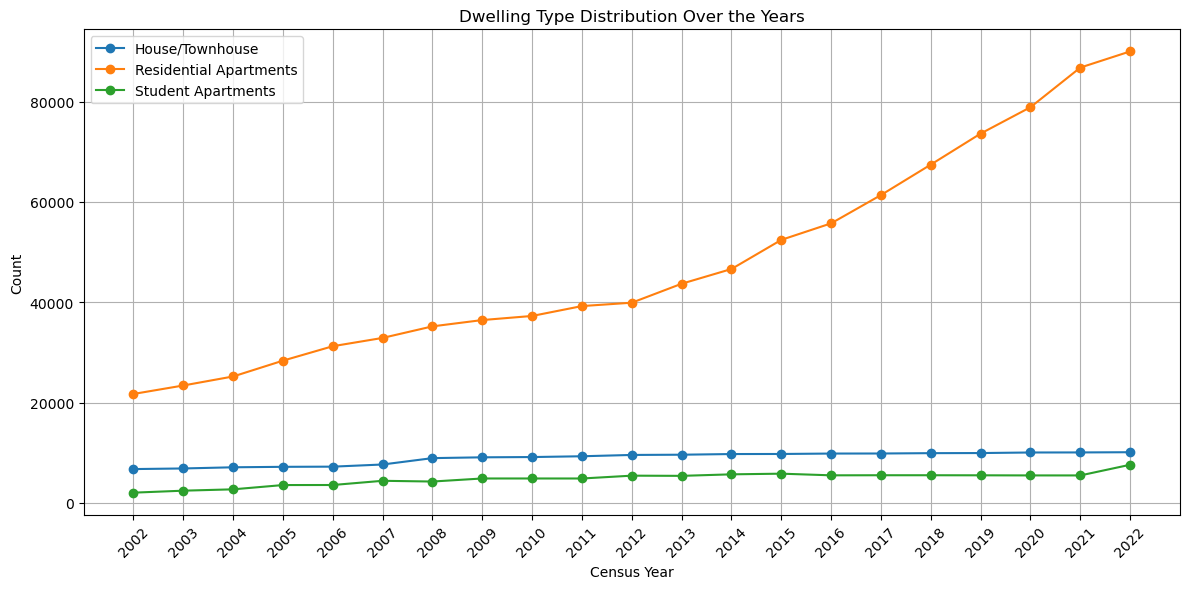

In [16]:
# Plot the counts of each dwelling type over the years
plt.figure(figsize=(12, 6))

# Plot House/Townhouse
plt.plot(dwelling_count_by_type.index, dwelling_count_by_type['House/Townhouse'], marker='o', label='House/Townhouse')

# Plot Residential Apartments
plt.plot(dwelling_count_by_type.index, dwelling_count_by_type['Residential Apartments'], marker='o', label='Residential Apartments')

# Plot Student Apartments
plt.plot(dwelling_count_by_type.index, dwelling_count_by_type['Student Apartments'], marker='o', label='Student Apartments')

# Set plot title and labels
plt.title('Dwelling Type Distribution Over the Years')
plt.xlabel('Census Year')
plt.ylabel('Count')
plt.xticks(dwelling_count_by_type.index, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


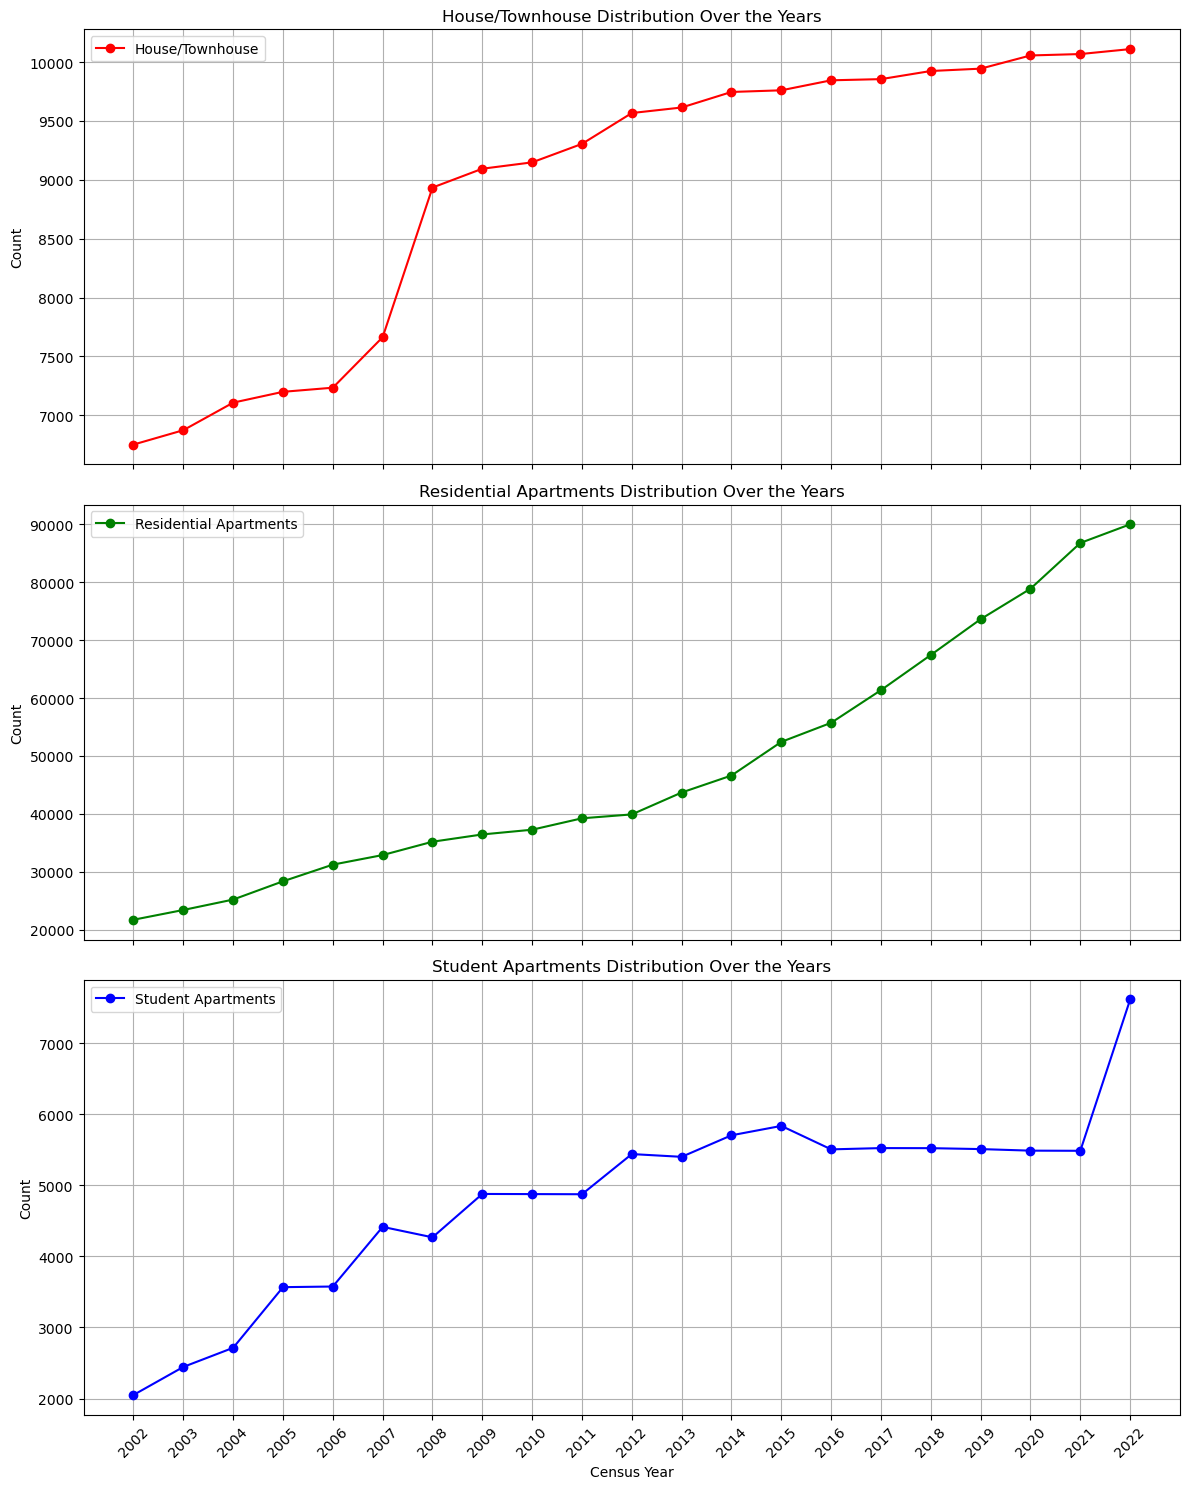

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

# Plot House/Townhouse
axes[0].plot(dwelling_count_by_type.index, dwelling_count_by_type['House/Townhouse'], marker='o', color='red', label='House/Townhouse')
axes[0].set_title('House/Townhouse Distribution Over the Years')
axes[0].set_ylabel('Count')
axes[0].grid(True)
axes[0].legend()

# Plot Residential Apartments
axes[1].plot(dwelling_count_by_type.index, dwelling_count_by_type['Residential Apartments'], marker='o', color='green', label='Residential Apartments')
axes[1].set_title('Residential Apartments Distribution Over the Years')
axes[1].set_ylabel('Count')
axes[1].grid(True)
axes[1].legend()

# Plot Student Apartments
axes[2].plot(dwelling_count_by_type.index, dwelling_count_by_type['Student Apartments'], marker='o', color='blue', label='Student Apartments')
axes[2].set_title('Student Apartments Distribution Over the Years')
axes[2].set_xlabel('Census Year')
axes[2].set_ylabel('Count')
axes[2].grid(True)
axes[2].legend()

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticks(dwelling_count_by_type.index)
    ax.set_xticklabels(dwelling_count_by_type.index, rotation=45)

plt.tight_layout()
plt.show()


### Total Dwelling Number within each clue_small_area over the Years

This code block provides a comprehensive visualization of the total number of dwellings per specific geographic area over time, utilizing a line plot for each area to showcase trends and changes. 
1. **Data Grouping and Aggregation**:
   - The data is grouped by both `census_year` and `clue_small_area` using the `groupby` method on the `by_area_data` DataFrame. This method groups the data to facilitate aggregation operations over each group.
   - `['Dwelling count'].sum()` aggregates the total dwellings in each group, providing the sum of dwellings for each area per year. This reflects the total housing capacity or growth in different parts of the city over time.
2. **Conversion to DataFrame**:
   - `total_dwelling_per_area_year.reset_index()` converts the grouped Series back into a DataFrame and restores 'census_year' and 'clue_small_area' as regular columns instead of indices. This step is crucial for subsequent plotting operations and data manipulation.
3. **Setup Plot**:
   - `plt.figure(figsize=(12, 6))` sets up the figure with a specific size to ensure that the plot is spacious enough for the data to be displayed clearly.
4. **Plotting Data for Each Area**:
   - The loop `for area in total_dwelling_per_area_year_df['clue_small_area'].unique():` iterates over each unique area found in the 'clue_small_area' column.
   - Within the loop, `area_data` filters `total_dwelling_per_area_year_df` to include only the data for the current area, ensuring that the plot function only receives relevant data.
   - `plt.plot(area_data['census_year'], area_data['Dwelling count'], label=area)` plots the yearly dwelling counts for each area. The `label=area` argument ensures each line has a corresponding label in the legend, identifying which line belongs to which area.
5. **Customize Plot Appearance**:
   - `plt.title`, `plt.xlabel`, and `plt.ylabel` set the title of the plot and labels for the x-axis and y-axis, providing context and information about what is plotted.
   - `plt.legend()` adds a legend to the plot, which helps in distinguishing the different lines corresponding to different areas.
   - `plt.grid(True)` enables a grid for easier visualization of the data points in relation to the plot's framework.
6. **Adjust X-axis Ticks**:
   - `plt.xticks(total_dwelling_per_area_year_df['census_year'].unique(), rotation=45)` sets the ticks on the x-axis to show each unique census year. The rotation improves the readability of the labels by preventing them from overlapping.

7. **Final Adjustments and Display**:
   - `plt.tight_layout()` adjusts the layout to make sure all plot elements are neatly packed within the plot area.
   - `plt.show()` displays the plot. This function renders the plot and is necessary to visualize the data after all setup steps are complete.
This visualization is particularly useful for urban planners, local government, and stakeholders interested in tracking housing developments across various parts of the city, allowing them to identify trends, growth, and possibly underserved areas.

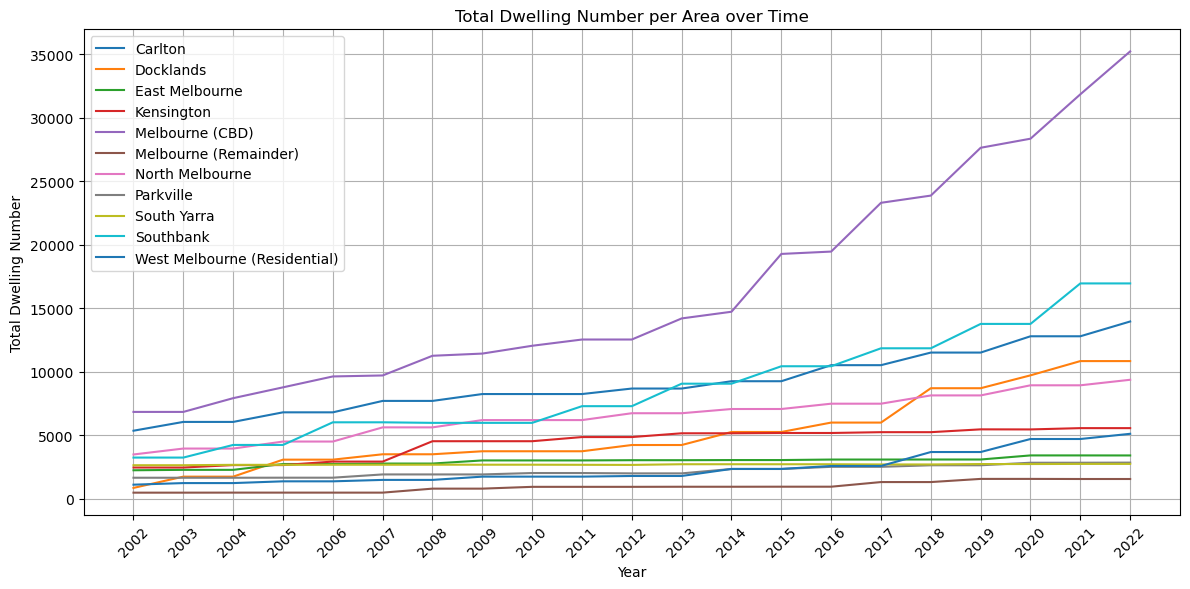

In [18]:
# Group by 'census_year' and 'clue_small_area', then sum 'dwelling_number' within each group
total_dwelling_per_area_year = by_area_data.groupby(['census_year', 'clue_small_area'])['Dwelling count'].sum()

# Convert the resulting Series to a DataFrame
total_dwelling_per_area_year_df = total_dwelling_per_area_year.reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for area in total_dwelling_per_area_year_df['clue_small_area'].unique():
    area_data = total_dwelling_per_area_year_df[total_dwelling_per_area_year_df['clue_small_area'] == area]
    plt.plot(area_data['census_year'], area_data['Dwelling count'], label=area)

plt.title('Total Dwelling Number per Area over Time')
plt.xlabel('Year')
plt.ylabel('Total Dwelling Number')
plt.legend()
plt.grid(True)

plt.xticks(total_dwelling_per_area_year_df['census_year'].unique(), rotation=45)

plt.tight_layout()
plt.show()

### Changes in each industry-specific floor space metrics over the years in Melbourne CBD 

This code snippet generates a series of bar plots to visualize changes in various industry-specific floor space metrics over the years for the Melbourne CBD area specifically.
1. **Data Filtering**:
   - `melbourne_cbd_data` is created by filtering `by_area_data` for entries where the `clue_small_area` is 'Melbourne (CBD)'. This dataset is focused only on Melbourne's central business district, providing a targeted view of changes in this specific area.
2. **Setup Subplots**:
   - `fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))` sets up a grid of subplots with 5 rows and 2 columns, creating a total of 10 plots. The figure size is specified to ensure there is enough space for all subplots.
   - `axes = axes.flatten()` converts the 2D array of axes into a 1D array, making it easier to iterate over with a single loop.
3. **Plotting**:
   - The loop iterates over each `feature` listed in `column_features`. These features represent different sectors like administration, business services, and so on.
   - `sns.barplot(data=melbourne_cbd_data, x='census_year', y=feature, ax=axes[index], color='skyblue')` creates a bar plot for each feature. The x-axis represents the census years, and the y-axis represents the value of the respective floor space feature. Each subplot is placed in the next available axis in the flattened `axes` array.
4. **Customize Each Plot**:
   - Inside the loop, each axis is customized:
     - `axes[index].set_title(f"Change in {feature.replace('_', ' ').title()} Over Years")` sets the title of each subplot, which describes the feature being plotted and indicates that it shows changes over the years.
     - `axes[index].set_xlabel('Census Year')` and `axes[index].set_ylabel(feature.replace('_', ' ').title())` set the labels for the x-axis and y-axis respectively. The y-axis label dynamically shows the name of the feature, made more readable by replacing underscores with spaces and capitalizing each word.
5. **Layout Adjustments**:
   - `plt.tight_layout()` adjusts the spacing between the plots automatically based on the figure content to prevent any overlapping of the elements.
6. **Display the Plots**:
   - `plt.show()` renders the complete figure with all subplots. This function displays the figure in a viewer or in the notebook if using an interactive environment like Jupyter.

This visualization is particularly useful in understanding how commercial and public service floor space in Melbourne's CBD has evolved. By visualizing each sector separately, it's easier to spot trends and make informed decisions about urban planning and economic development in this key business district.

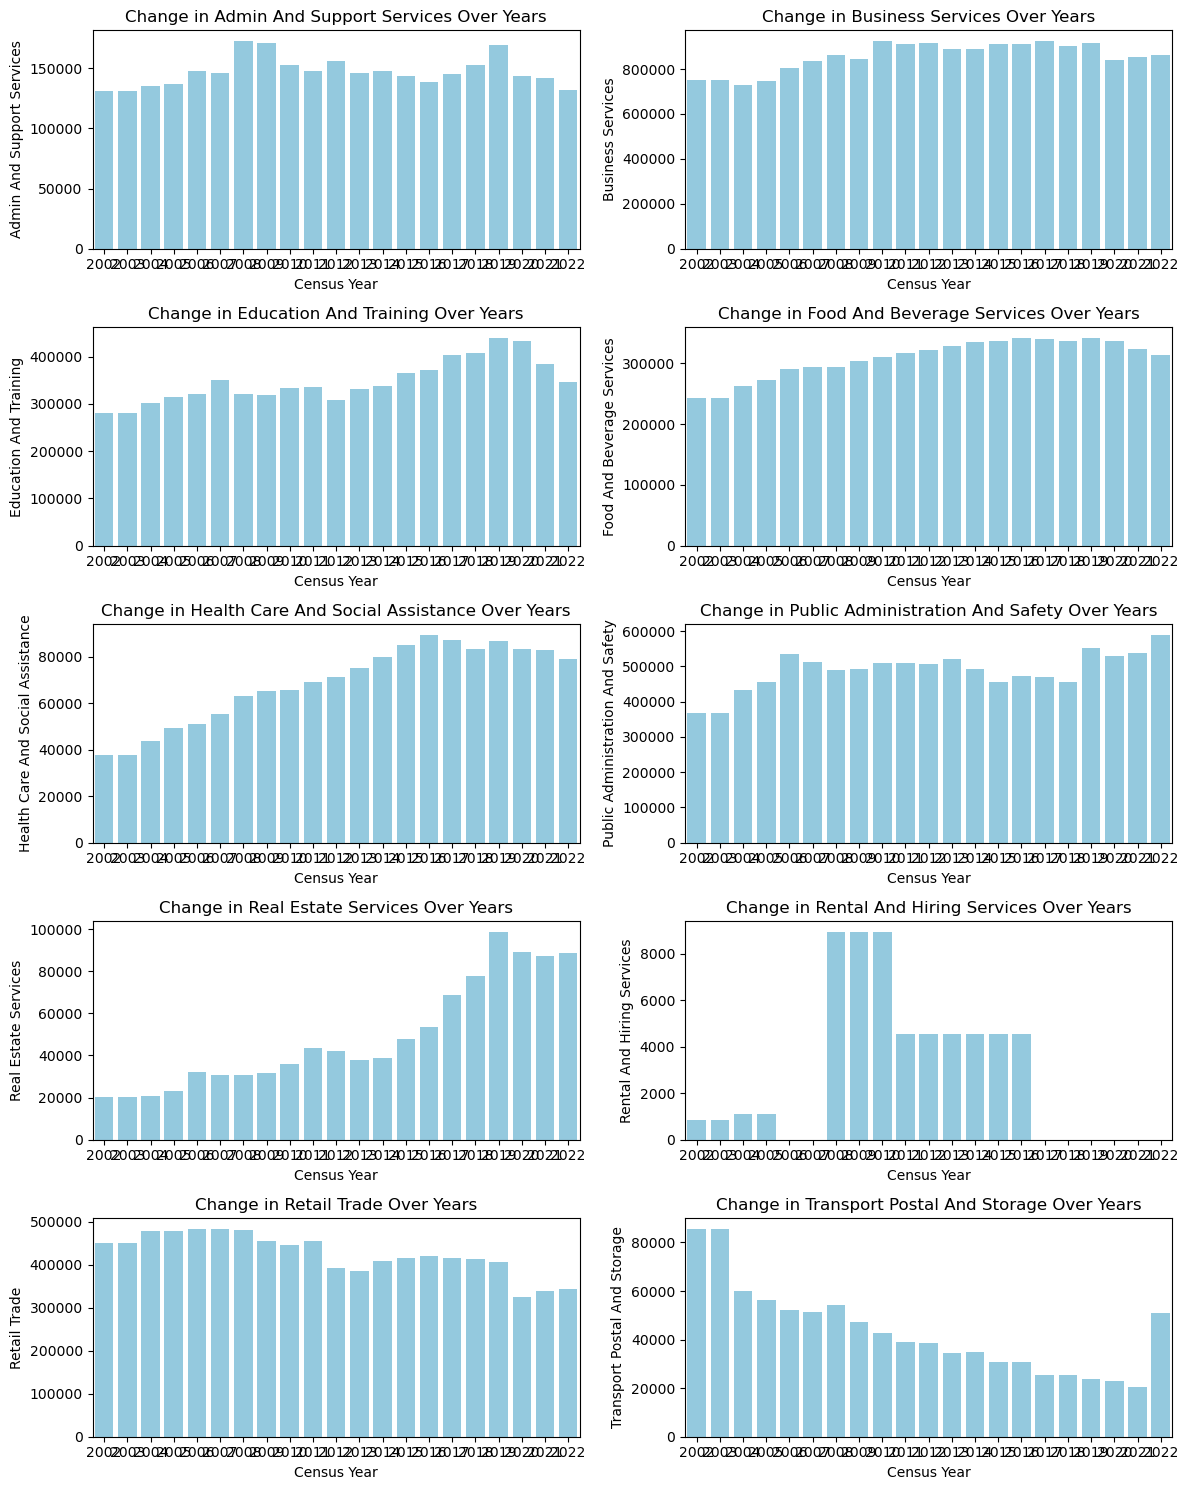

In [19]:
melbourne_cbd_data = by_area_data[by_area_data['clue_small_area'] == 'Melbourne (CBD)']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15)) 
axes = axes.flatten()
for index, feature in enumerate(column_features):
    
    sns.barplot(
        data=melbourne_cbd_data,
        x='census_year', 
        y=feature,
        ax=axes[index],
        color='skyblue'
    )
    axes[index].set_title(f"Change in {feature.replace('_', ' ').title()} Over Years")
    axes[index].set_xlabel('Census Year')
    axes[index].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()


## Changes in each industry-specific floor space metrics over the years in Southbank

This code block aims to visualize changes in various industry-specific floor space metrics over the years specifically for the Southbank area. It's very similar to the previous Melbourne CBD visualization but focuses on a different area. 

This structured visualization also allows to clearly see how commercial and public service activities have evolved in Southbank, aiding in strategic planning and decision-making processes for the area.

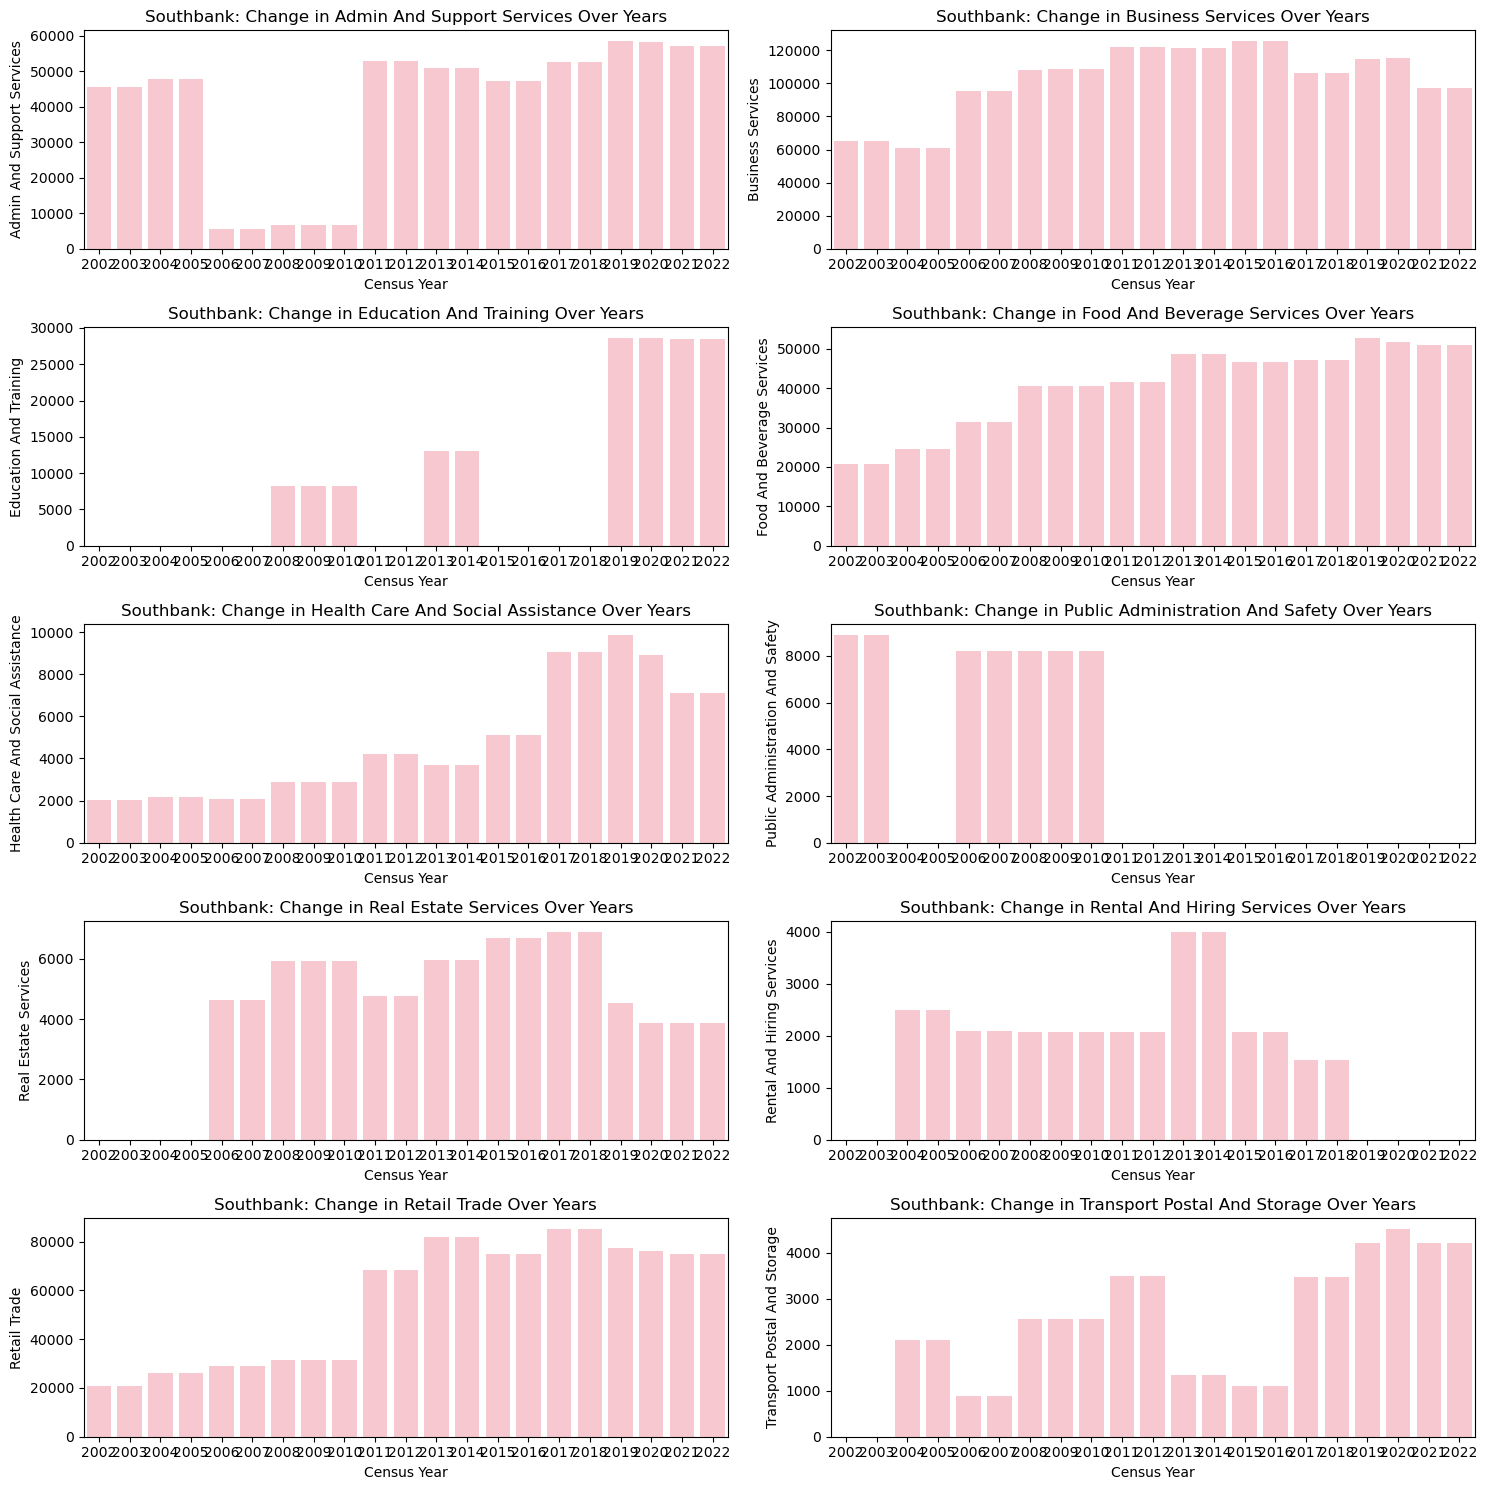

In [20]:
southbank_data = by_area_data[by_area_data['clue_small_area'] == 'Southbank']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15)) 
axes = axes.flatten()
for index, feature in enumerate(column_features):
    
    sns.barplot(
        data=southbank_data,
        x='census_year', 
        y=feature,
        ax=axes[index],
        color='pink' 
    )
    axes[index].set_title(f"Southbank: Change in {feature.replace('_', ' ').title()} Over Years")
    axes[index].set_xlabel('Census Year')
    axes[index].set_ylabel(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()



### Visualize the relationship between 'Total Dwelling Number' and floor space categories 

This code visualize the relationship between total dwelling numbers and various industry-specific floor space metrics. Each scatter plot will show how changes in floor space for different services correlate with the number of dwellings for each census year.
1. **Setup Subplots**:
   - `fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))` creates a grid of subplots arranged into 5 rows and 2 columns. The `figsize` is set larger to ensure ample space for each plot, accommodating the detail and scale of the data visualization.
   - `axes = axes.flatten()` converts the 2D axes array into a 1D array, simplifying the process of iterating over it with a loop.
2. **Plotting Scatter Plots**:
   - The loop `for i, category in enumerate(column_features):` iterates through each category in `column_features`. These categories represent different types of floor space metrics such as administrative services, business services, etc.
   - Within the loop, `sns.scatterplot(y='Total Dwelling Number', x=category, data=yearly_data, ax=axes[i])` generates a scatter plot for each category:
     - `x=category` sets the x-axis to represent the floor space metric for the given category.
     - `y='Total Dwelling Number'` sets the y-axis to show the total number of dwellings.
     - `data=yearly_data` specifies the DataFrame source of the data.
     - `ax=axes[i]` assigns the plot to a specific subplot axis within the flattened axes array.
3. **Customize Each Plot**:
   - `axes[i].set_title(f'Relationship between Total Dwelling Number and {category}')` adds a title to each subplot, clearly describing the relationship being analyzed.
   - `axes[i].set_ylabel('Total Dwelling Number')` and `axes[i].set_xlabel(category)` set the labels for the y-axis and x-axis respectively, enhancing clarity and readability. The x-axis label dynamically changes based on the category being plotted.
4. **Layout Adjustments**:
   - `plt.tight_layout()` is called to adjust the spacing between the plots automatically based on their content. This ensures that all elements of the plot are displayed properly without any overlap or cutting off of important information.
5. **Display the Plots**:
   - `plt.show()` renders the entire figure with all subplots. This function is essential for displaying the visualized data, particularly useful when analyzing complex relationships across multiple categories.

The use of scatter plots in this context is particularly effective for identifying patterns or trends in the data, such as positive or negative correlations between the amount of specific types of floor space and the total number of dwellings. This can provide valuable insights for urban planning, economic analysis, and policy-making, highlighting potential impacts of commercial activities on residential growth or density.

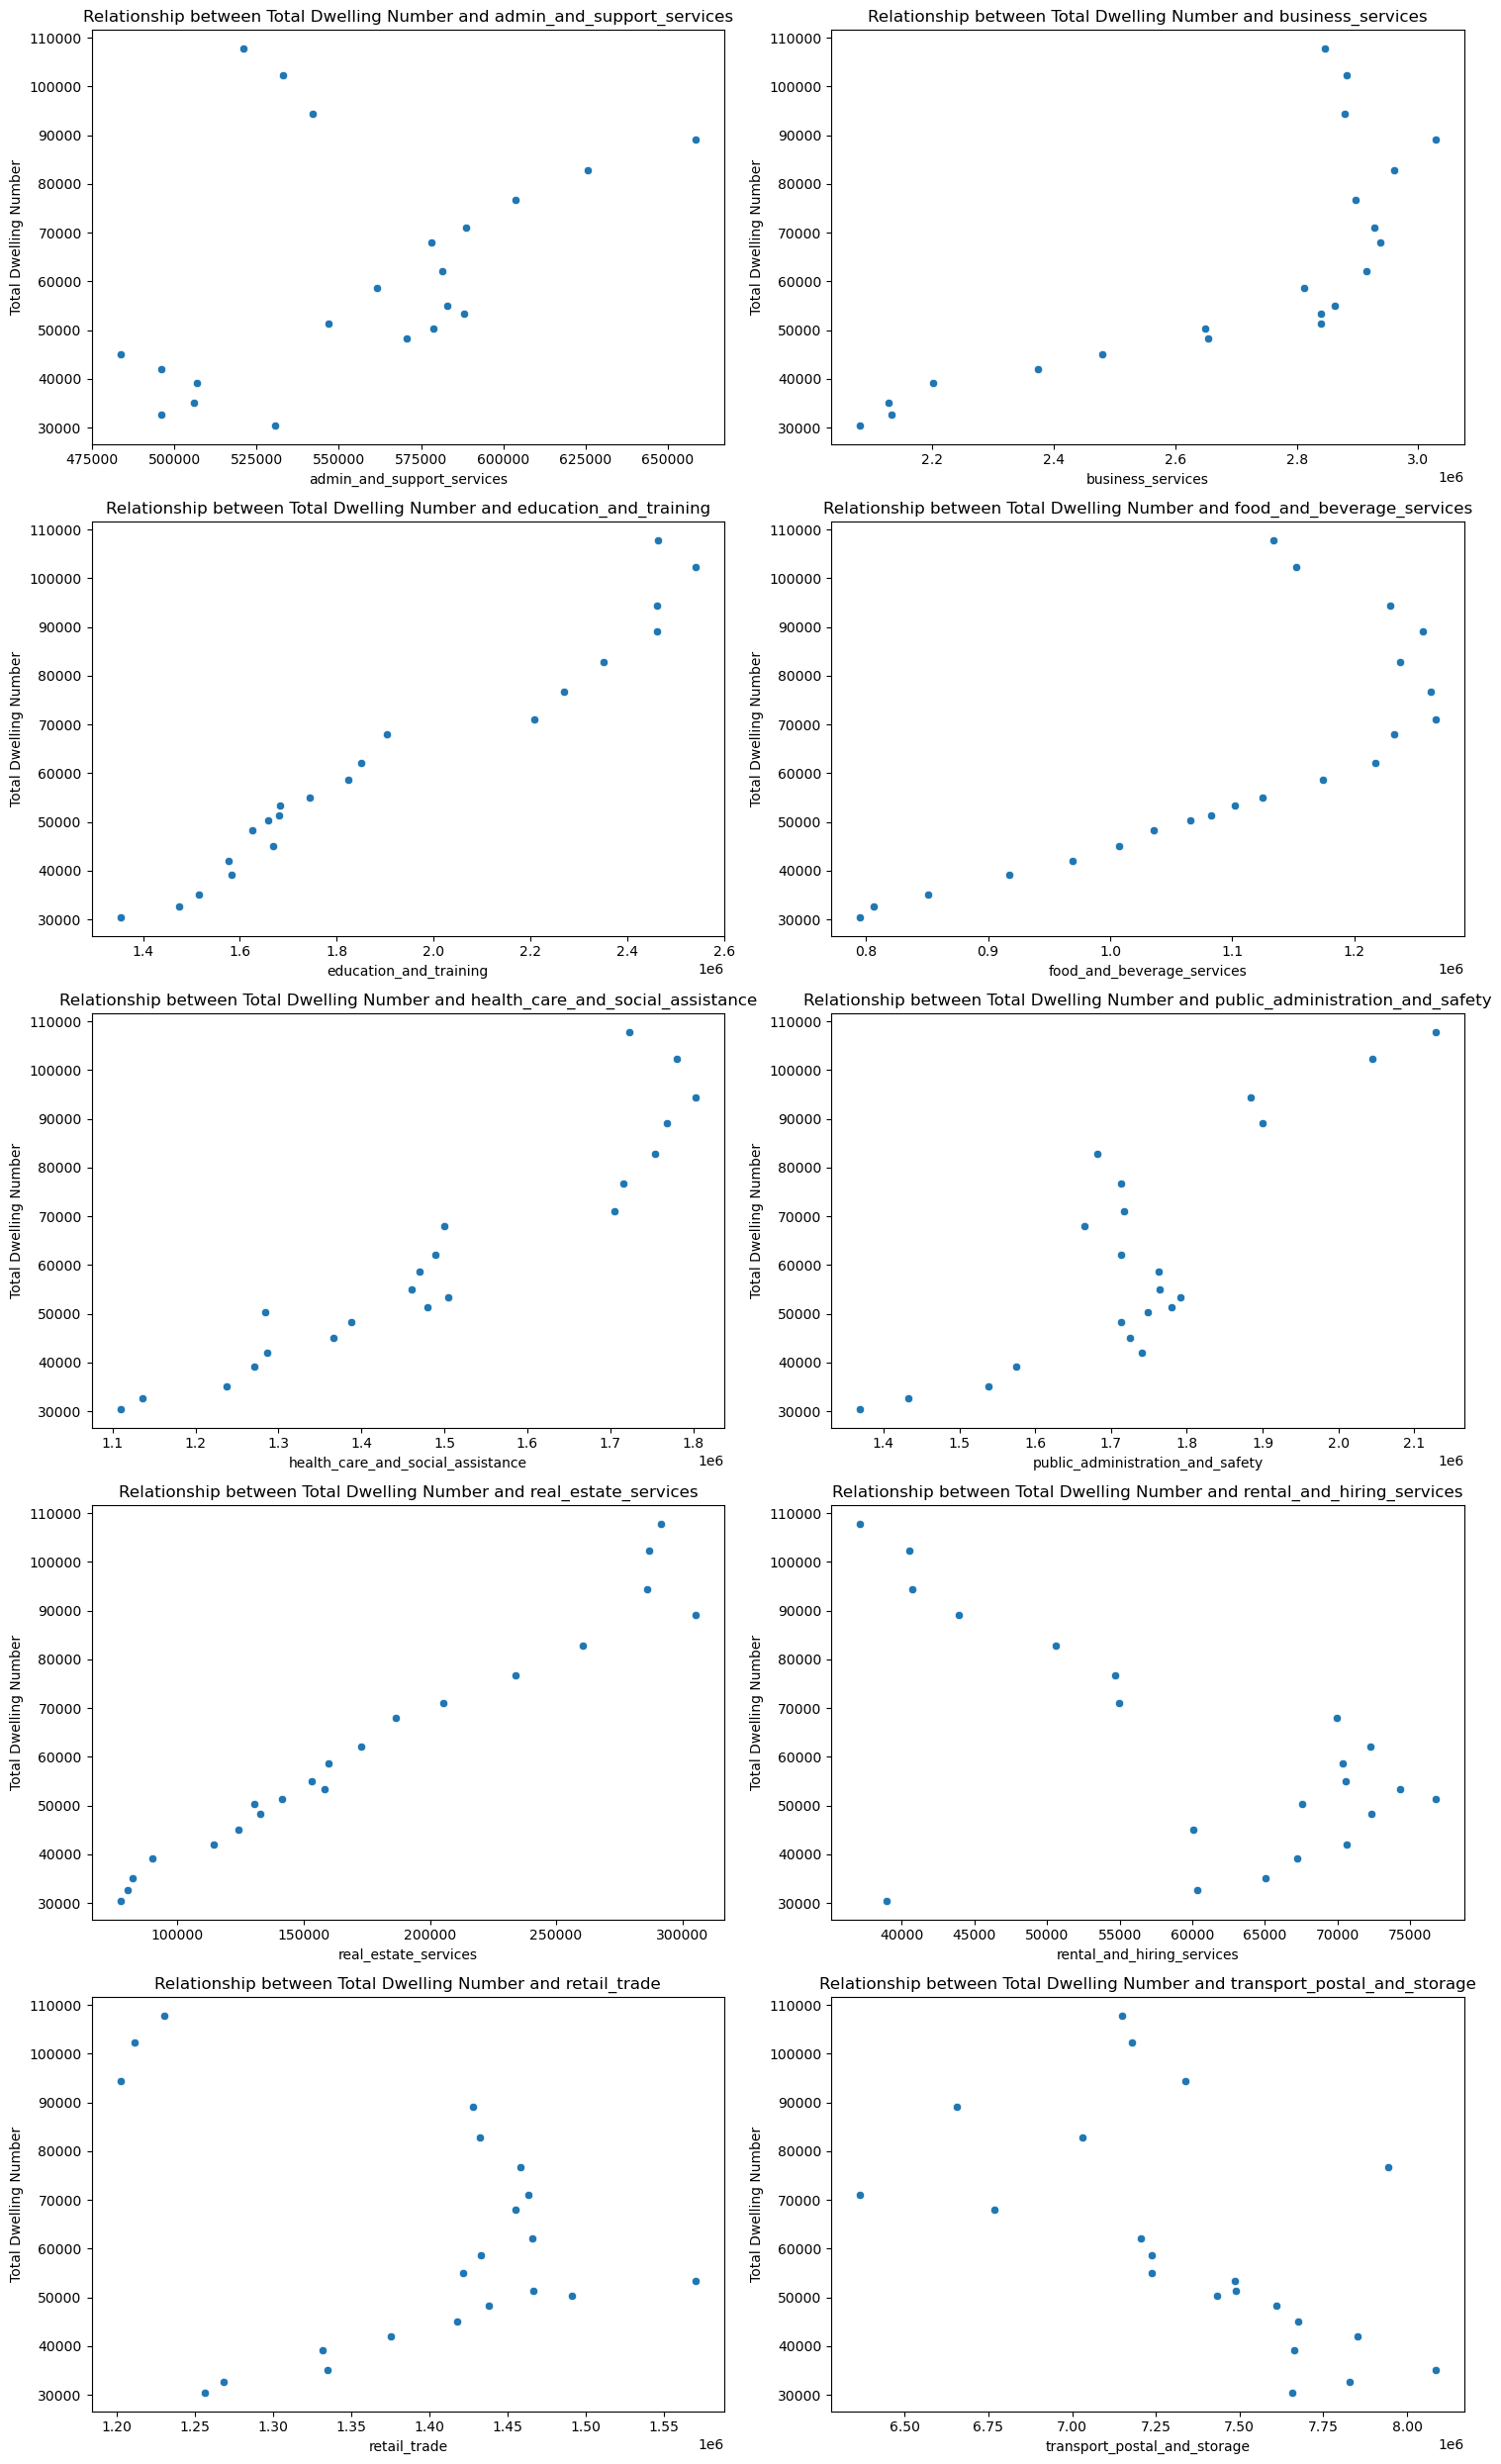

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25)) 
axes = axes.flatten() 

for i, category in enumerate(column_features):
    sns.scatterplot(y='Total Dwelling Number', x=category, data=yearly_data, ax=axes[i])
    axes[i].set_title(f'Relationship between Total Dwelling Number and {category}')
    axes[i].set_ylabel('Total Dwelling Number')
    axes[i].set_xlabel(category)

plt.tight_layout()
plt.show()

Observations based on the patterns visible in the scatter plots:

1. **Admin and Support Services**: There seems to be a positive correlation between the Total Dwelling Number and admin and support services. As the number of dwellings increases, the count of admin and support services also tends to increase.

2. **Business Services**: A similar positive trend appears for business services. Higher dwelling numbers coincide with higher counts of business services.

3. **Education and Training**: The plot shows a positive trend indicating that more dwellings are associated with increased education and training services.

4. **Food and Beverage Services**: This category also follows a positive correlation with the Total Dwelling Number.

5. **Health Care and Social Assistance**: The trend is upwards, indicating that as dwellings increase, health care and social assistance services also rise.

6. **Public Administration and Safety**: There is a spread of data points, but a general positive trend can be discerned, suggesting more dwellings are associated with a higher count of public administration and safety services.

7. **Real Estate Services**: This service category has a distinctly strong positive correlation with Total Dwelling Number, which makes intuitive sense as more dwellings could lead to a greater need for real estate services.

8. **Rental and Hiring Services**: The data points are more scattered, but there seems to be an overall positive relationship.

9. **Retail Trade**: The correlation is not as clear in this category; there are more dwellings with a wide range of retail trade services.

10. **Transport Postal and Storage**: The relationship is less clear with a lot of variability in the transport postal and storage services as dwelling numbers change.

Overall, most service categories seem to have a positive correlation with the Total Dwelling Number, suggesting that as residential areas grow, the associated services in these areas tend to increase as well. 

### Calculate the Pearson correlation coefficient 

Pearson correlation coefficient between the total number of dwellings and various industry-specific floor space metrics provides a quantitative measure of the strength and direction of their linear relationships.

1. **Calculating Pearson Correlation Coefficient**:
   - The Pearson correlation coefficient is a statistical measure that evaluates the linear relationship between two variables. It ranges from -1 to 1, where:
     - **1** indicates a perfect positive linear relationship,
     - **-1** indicates a perfect negative linear relationship,
     - **0** indicates no linear relationship.
   - The loop `for category in column_features:` iterates over each category in `column_features`, which includes different types of floor space such as administrative support, business services, etc.

2. **Calculate Correlation**:
   - Inside the loop, `correlation = yearly_data['Total Dwelling Number'].corr(yearly_data[category])` computes the Pearson correlation coefficient between the total dwelling number and the floor space metric for each category. This is done using the `corr()` method from Pandas, which is applied to the series of data points corresponding to total dwellings and each specific floor space category.
   - `yearly_data[category]` fetches the column from the `yearly_data` DataFrame that corresponds to the current category being evaluated.
3. **Output the Correlation**:
   - The correlation result is printed with a formatted string that includes the category name and the correlation value rounded to two decimal places for readability: `print(f'Correlation between Total Dwelling Number and {category}: {correlation:.2f}')`.
   - This output helps quickly assess the nature of the relationship:
     - A high positive correlation might suggest that as the floor space for a certain industry increases, the total number of dwellings also increases, potentially indicating an area of economic growth attracting residential development.
     - A high negative correlation might indicate that increases in certain types of floor space are associated with decreases in dwelling numbers, which could suggest displacement or a shift in land use away from residential purposes.
     - Low or near-zero correlation indicates little to no linear relationship, suggesting that changes in the specific type of floor space do not significantly affect the total number of dwellings.

This analysis is particularly useful to understand how different commercial or public sectors might be impacting residential growth or decline. This can guide strategic decisions regarding zoning, infrastructure development, and urban renewal projects.

In [22]:
# Calculate and print the Pearson correlation coefficient for each category
for category in column_features:
    correlation = yearly_data['Total Dwelling Number'].corr(yearly_data[category])
    print(f'Correlation between Total Dwelling Number and {category}: {correlation:.2f}')


Correlation between Total Dwelling Number and admin_and_support_services: 0.42
Correlation between Total Dwelling Number and business_services: 0.77
Correlation between Total Dwelling Number and education_and_training: 0.98
Correlation between Total Dwelling Number and food_and_beverage_services: 0.77
Correlation between Total Dwelling Number and health_care_and_social_assistance: 0.94
Correlation between Total Dwelling Number and public_administration_and_safety: 0.82
Correlation between Total Dwelling Number and real_estate_services: 0.98
Correlation between Total Dwelling Number and rental_and_hiring_services: -0.61
Correlation between Total Dwelling Number and retail_trade: -0.23
Correlation between Total Dwelling Number and transport_postal_and_storage: -0.59


- **Admin and Support Services (0.42)**: A moderate positive correlation suggests that as admin and support services increase, the total dwelling number tends to increase as well, but not strongly.
- **Business Services (0.77)**: A strong positive correlation indicates that areas with more business services tend to have more dwellings.
- **Education and Training (0.98)**: A very strong positive correlation implies that areas with more educational facilities have a significantly higher number of dwellings.
- **Food and Beverage Services (0.77)**: Similar to business services, a strong positive correlation suggests that higher numbers of food and beverage services are associated with higher dwelling numbers.
- **Health Care and Social Assistance (0.94)**: A very strong positive correlation indicates that areas with more healthcare and social services tend to have many dwellings.
- **Public Administration and Safety (0.82)**: A strong positive correlation suggests that areas with more public administration and safety services have more dwellings.
- **Real Estate Services (0.98)**: A very strong positive correlation indicates a close relationship between real estate services and the number of dwellings, which is expected as real estate activities typically increase with more housing.
- **Rental and Hiring Services (-0.61)**: A moderate negative correlation suggests that areas with more rental and hiring services tend to have fewer dwellings, which might be indicative of less residential space or more commercial focus.
- **Retail Trade (-0.23)**: A weak negative correlation, almost negligible, indicating that more retail trade doesn't significantly impact dwelling numbers.
- **Transport, Postal and Storage (-0.59)**: A moderate negative correlation suggests that areas with more transport, postal, and storage services have fewer dwellings, possibly indicating these are more industrial or commercial areas with less residential space.


### Visualization of the relationship between floor space categories and dwelling numbers for each dwelling type

This code block aims to visually analyze the relationships between specific service sector floor spaces and various dwelling types over time. It uses a scatter plot to depict these relationships for selected service categories. Here’s a detailed breakdown of how the code functions:

1. **Prepare Data for Visualization**:
   - `melted_data = yearly_data.melt(id_vars=['census_year'] + selected_services, value_vars=['House/Townhouse', 'Residential Apartments', 'Student Apartments'], var_name='Dwelling Type', value_name='Count')`: This line transforms the `yearly_data` DataFrame from wide to long format. The `id_vars` include the census year and selected service sectors, which remain as columns in the melted DataFrame. The `value_vars` list specifies the columns to unpivot, which are the types of dwellings. After melting, there will be a 'Dwelling Type' column indicating the type of dwelling, and a 'Count' column showing its corresponding value.

2. **Setup Plot Environment**:
   - `fig, axes = plt.subplots(1, len(selected_services), figsize=(20, 6))` sets up a single row of subplots, with one subplot for each selected service. The figure size is sufficiently wide to accommodate all subplots side-by-side.

3. **Plotting Data**:
   - The loop `for i, service in enumerate(selected_services):` iterates through the list of selected services. For each service:
     - `sns.scatterplot(ax=axes[i], data=melted_data, y='Count', x=service, hue='Dwelling Type', palette=dwelling_colors)` creates a scatter plot on the ith subplot (`axes[i]`). This scatter plot shows the relationship between the floor space for the service (x-axis) and the count of each dwelling type (y-axis). The `hue='Dwelling Type'` parameter uses different colors to distinguish between dwelling types, with the `palette=dwelling_colors` specifying the colors for each type.
   
4. **Customize Each Plot**:
   - Inside the loop:
     - `axes[i].set_title(f'Relationship between {service} and Dwelling Types')` sets the title of each subplot to reflect the specific service being analyzed.
     - `axes[i].set_ylabel('Dwelling Count')` and `axes[i].set_xlabel(service)` set the labels for the y-axis and x-axis, respectively, clearly indicating what each axis represents.
     - `axes[i].legend(title='Dwelling Type')` adds a legend to each subplot, with the title 'Dwelling Type' to clarify what the colors represent.

5. **Layout Adjustments**:
   - `plt.tight_layout()` is called to automatically adjust subplot parameters (such as margins) to give the plot sufficient space and prevent any overlapping text or elements.

6. **Display the Plots**:
   - `plt.show()` renders the figure with the scatter plots. This function is crucial for displaying the visual output in the notebook or viewer.

This visualization strategy is highly effective for analyzing how the availability of various services like education, food and beverage, and healthcare relates to residential development. By distinguishing between different types of dwellings, it provides insights into which services might be driving growth in certain types of housing, thus aiding urban planners and developers in making informed decisions regarding infrastructure and services provisioning.

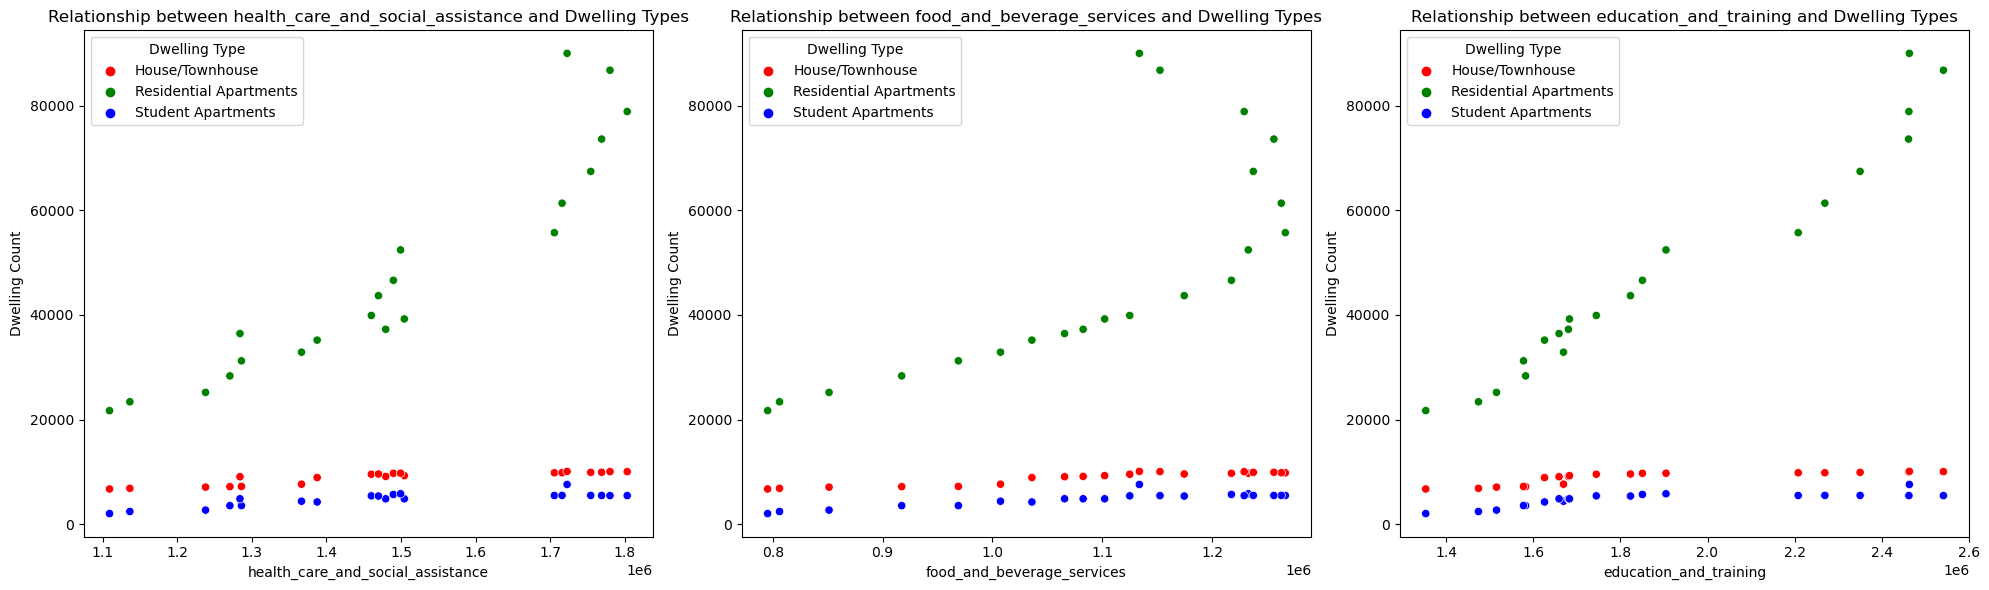

In [23]:
dwelling_colors = {
    'House/Townhouse': 'red',
    'Residential Apartments': 'green',
    'Student Apartments': 'blue'
}
selected_services = {
    'education_and_training',
    'food_and_beverage_services',
    'health_care_and_social_assistance'
}
selected_services = list(selected_services)
# Melt the DataFrame to have dwelling types and counts in long format
melted_data = yearly_data.melt(id_vars=['census_year'] + selected_services, 
                               value_vars=['House/Townhouse', 'Residential Apartments', 'Student Apartments'], 
                               var_name='Dwelling Type', value_name='Count')

fig, axes = plt.subplots(1, len(selected_services), figsize=(20, 6))
for i, service in enumerate(selected_services):
    sns.scatterplot(ax=axes[i], data=melted_data, y='Count', x=service, hue='Dwelling Type', 
                    palette=dwelling_colors)
    
    axes[i].set_title(f'Relationship between {service} and Dwelling Types')
    axes[i].set_ylabel('Dwelling Count')
    axes[i].set_xlabel(service)
    axes[i].legend(title='Dwelling Type')

plt.tight_layout()
plt.show()

### Visualize the relationship between 'education_and_training' and Dwelling type

This code visualizes the relationship between the availability of education and training services and different types of dwellings (House/Townhouse, Residential Apartments, Student Apartments) using scatter plots. 
1. **Setup Plot Environment**:
   - `fig, axes = plt.subplots(1, 3, figsize=(18, 6))` sets up a figure with a row of three subplots, arranged side-by-side. The figure size is specified to ensure each plot has enough space to display its data clearly.
2. **Plotting Scatter Plots**:
   - **First Plot (House/Townhouse vs. Education & Training)**:
     - `axes[0].scatter(yearly_data['House/Townhouse'], yearly_data['education_and_training'])` plots data points showing the relationship between the floor space dedicated to education and training and the number of House/Townhouses. This plot can help identify any trends or correlations between increased educational facilities and the dwelling count in this category.
     - `axes[0].set_title('Education & Training vs House/Townhouse')` sets the title of the first subplot.
     - `axes[0].set_ylabel('House/Townhouse')` and `axes[0].set_xlabel('Education & Training')` label the y-axis and x-axis, respectively, indicating the variables being compared.

   - **Second Plot (Residential Apartments vs. Education & Training)**:
     - `axes[1].scatter(yearly_data['Residential Apartments'], yearly_data['education_and_training'])` shows the relationship for Residential Apartments. This could indicate whether areas with more educational facilities have a higher number of apartments.
     - `axes[1].set_title('Education & Training vs Residential Apartments')` and the axis labels are set similarly to the first plot, adjusted for the dwelling type.
   - **Third Plot (Student Apartments vs. Education & Training)**:
     - `axes[2].scatter(yearly_data['Student Apartments'], yearly_data['education_and_training'])` focuses on Student Apartments. This plot is particularly insightful as one might expect a strong correlation between student apartments and proximity to educational institutions.
     - `axes[2].set_title('Education & Training vs Student Apartments')` completes the titles and labels, ensuring each subplot is clearly described and easy to understand.
3. **Layout Adjustments**:
   - `plt.tight_layout()` adjusts the subplots within the figure layout to minimize any overlap and ensure that the labels, titles, and plots are clearly visible.
4. **Display the Plots**:
   - `plt.show()` renders the figure with its subplots. This function displays the visual output, allowing for an immediate visual assessment of the relationships being analyzed.
   
These scatter plots provide valuable insights into how the provision of education and training services potentially influences the type and number of dwellings in an area. Observing the distribution and density of these points can suggest trends, such as higher education and training services correlating with increased residential apartments, which could be useful for urban planning and development strategy.

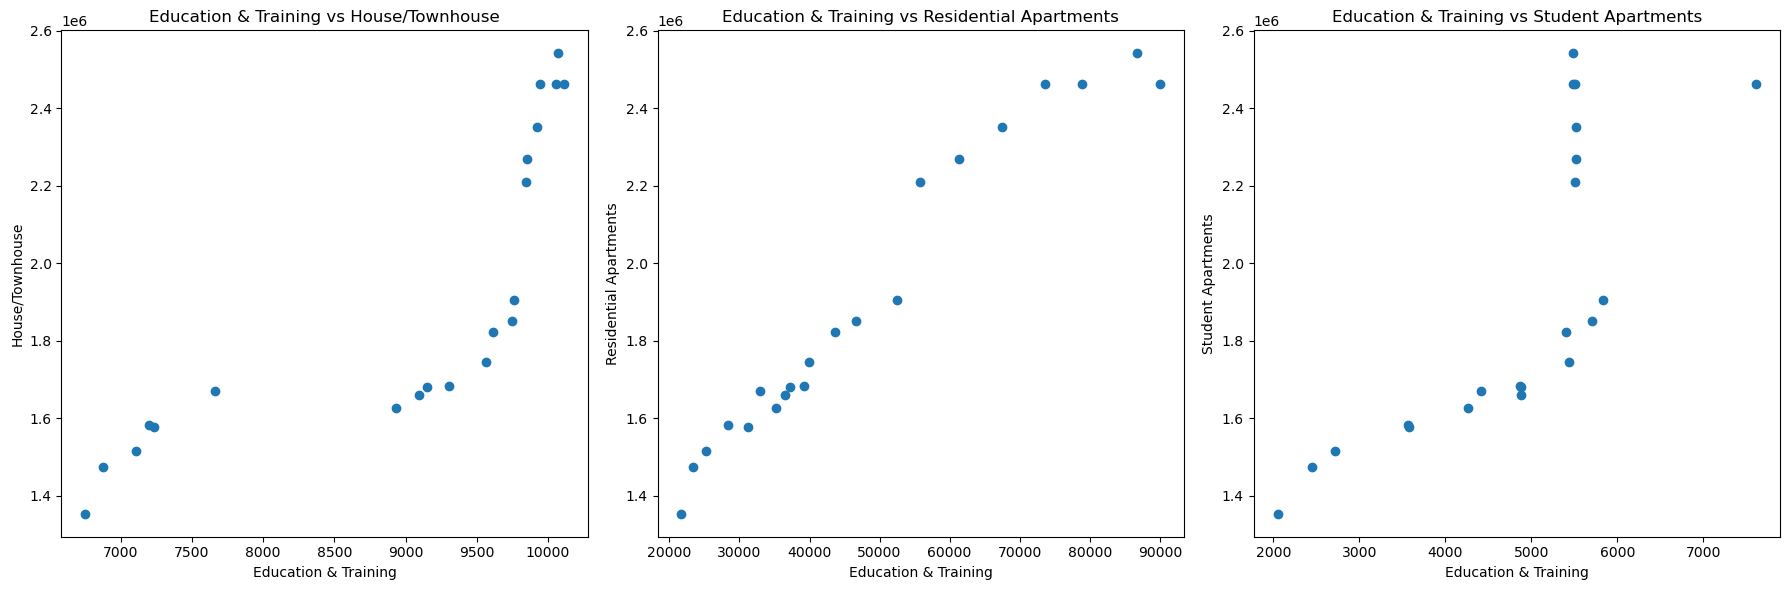

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for education_and_training vs House/Townhouse
axes[0].scatter(yearly_data['House/Townhouse'], yearly_data['education_and_training'])
axes[0].set_title('Education & Training vs House/Townhouse')
axes[0].set_ylabel('House/Townhouse')
axes[0].set_xlabel('Education & Training')

# Scatter plot for education_and_training vs Residential Apartments
axes[1].scatter(yearly_data['Residential Apartments'], yearly_data['education_and_training'])
axes[1].set_title('Education & Training vs Residential Apartments')
axes[1].set_ylabel('Residential Apartments')
axes[1].set_xlabel('Education & Training')

# Scatter plot for education_and_training vs Student Apartments
axes[2].scatter(yearly_data['Student Apartments'], yearly_data['education_and_training'])
axes[2].set_title('Education & Training vs Student Apartments')
axes[2].set_ylabel('Student Apartments')
axes[2].set_xlabel('Education & Training')
plt.tight_layout()
plt.show()


1. **House/Townhouse vs. Education & Training**:
   The plot shows a trend that could be indicative of a positive correlation. As the number of House/Townhouses increases, the education and training services seem to increase as well, though there is some variability in the data points.

2. **Residential Apartments vs. Education & Training**:
   Similar to House/Townhouse, there's a visible upward trend, suggesting a positive correlation. As the number of Residential Apartments increases, the education and training services also appear to increase. The data points are spread out but follow an upward trajectory.

3. **Student Apartments vs. Education & Training**:
   This plot shows a strong positive relationship. The vertical alignment of data points at different intervals along the horizontal axis indicates that the number of Student Apartments may be reported in specific categories or ranges, and within each category, as the number of Student Apartments increases, there is a corresponding significant increase in education and training services.


This code snippet calculates and displays the Pearson correlation coefficients for the relationship between education and training floor space and three different dwelling types: House/Townhouse, Residential Apartments, and Student Apartments.
1. **Calculate Correlation Coefficients**:
   - `corr_house_townhouse = yearly_data['education_and_training'].corr(yearly_data['House/Townhouse'])` calculates the Pearson correlation coefficient between the floor space dedicated to education and training and the number of House/Townhouses. This value helps to determine if there is a significant linear relationship between education facilities and the number of these dwelling types.
   - `corr_residential_apt = yearly_data['education_and_training'].corr(yearly_data['Residential Apartments'])` does the same for Residential Apartments. Given that these typically serve a diverse demographic, any correlation could indicate a potential impact of education facilities on residential living choices.
   - `corr_student_apt = yearly_data['education_and_training'].corr(yearly_data['Student Apartments'])` calculates the correlation for Student Apartments. It is intuitive to expect a positive correlation here, as student apartments are likely located near educational institutions.

These outputs provide insights into how closely related the presence of education and training services is to the availability or development of different types of housing. Understanding these correlations can help urban planners and developers make informed decisions about where to allocate resources for education facilities based on the type of housing development they want to encourage or support.

In [25]:
# Calculate and print the Pearson correlation coefficient
corr_house_townhouse = yearly_data['education_and_training'].corr(yearly_data['House/Townhouse'])
corr_residential_apt = yearly_data['education_and_training'].corr(yearly_data['Residential Apartments'])
corr_student_apt = yearly_data['education_and_training'].corr(yearly_data['Student Apartments'])

print(f'Correlation between education_and_training and House/Townhouse: {corr_house_townhouse:.2f}')
print(f'Correlation between education_and_training and Residential Apartments: {corr_residential_apt:.2f}')
print(f'Correlation between education_and_training and Student Apartments: {corr_student_apt:.2f}')


Correlation between education_and_training and House/Townhouse: 0.80
Correlation between education_and_training and Residential Apartments: 0.98
Correlation between education_and_training and Student Apartments: 0.77


### Conclusion

The comprehensive analysis of dwelling types and corresponding floor space allocations across Melbourne has yielded several critical insights that are instrumental for urban planning and development strategies:

1. **Trends in Dwelling Types**:
   - The study reveals a robust increase in residential apartments, particularly in Melbourne's CBD and surrounding areas. This trend reflects the city's focus on vertical living to accommodate population growth without extending the urban sprawl.
   - Conversely, House/Townhouse types have shown more stability but with slight increases in the outer suburbs, indicating a continuing demand for traditional family housing outside the dense city core.

2. **Geographical Disparities**:
   - Different regions exhibit distinct preferences in dwelling types. For example, Southbank and Carlton have experienced significant growth in student apartments, correlating with the presence of universities and educational institutions in these areas.
   - This disparity suggests that educational infrastructure is a major driver of housing developments, which urban planners must consider in zoning and resource allocation.

3. **Correlation with Commercial Services**:
   - The correlation analysis between dwelling numbers and commercial floor space, particularly for education and training, healthcare, and food and beverage services, indicates that areas with higher commercial amenities tend to attract more dense residential developments.
   - Notably, the positive correlation between education services and student apartments emphasizes the need for planning student accommodations in close proximity to educational hubs.

4. **Policy and Planning Implications**:
   - These findings suggest that Melbourne's future urban planning initiatives should continue to support the densification of residential developments in areas with substantial commercial services. This approach can enhance the livability and sustainability of urban environments.
   - Additionally, there is a clear need for strategic planning around educational and healthcare infrastructures, as these services strongly influence housing trends and, subsequently, the urban landscape.

### References
- **Melbourne City Open Data Portal**: Provided the primary datasets for residential dwellings and commercial floor space.
- **Python Libraries (Pandas, Matplotlib, Seaborn)**: Utilized for data manipulation and visual representation, facilitating a deeper understanding of urban trends.

